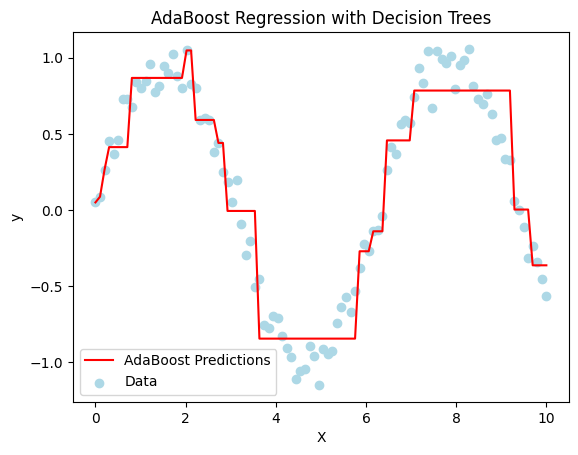

In [10]:
import numpy as np

class SimpleLinearRegressor:
    """Simple Linear Regressor based on Ordinary Least Squares."""
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Adding bias term
        X = np.c_[np.ones(X.shape[0]), X]
        # Calculating coefficients using the Normal Equation
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        # Adding bias term
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.coefficients


class AdaBoostRegressor:
    """AdaBoost for Regression with simple linear regressors as weak learners."""
    def __init__(self, n_estimators=50, ada_proportion=0.1):
        self.n_estimators = n_estimators
        self.estimators = []
        self.estimator_weights = []
        self.sample_weights = []

    def fit(self, X, y):
        # Initialize weights to equal values
        sample_weight = np.ones(len(X)) / len(X)

        for i in range(self.n_estimators):
            # Resample the data according to current sample weights
            indices = np.random.choice(np.arange(len(X)), size=int(len(X)*ada_proportion), p=sample_weight)
            X_resampled, y_resampled = X[indices], y[indices]

            # Fit a regressor to the resampled data
            regressor = SimpleLinearRegressor()
            regressor.fit(X_resampled, y_resampled)
            y_pred = regressor.predict(X)

            # Calculate error and estimator weight using absolute error
            error = np.average(np.abs(y - y_pred), weights=sample_weight)

            # Prevent division by zero and clamp the error term
            error = np.clip(error, 1e-10, 1 - 1e-10)
            alpha = 0.5 * np.log((1 - error) / error)

            # Update sample weights
            sample_weight *= np.exp(alpha * np.abs(y_pred - y))
            sample_weight /= sample_weight.sum()

            # Save the trained regressor and its weight
            self.estimators.append(regressor)
            self.estimator_weights.append(alpha)
            self.sample_weights.append(sample_weight.copy())

    def predict(self, X):
        # Weighted sum of predictions from all regressors
        regressor_preds = np.array([regressor.predict(X) for regressor in self.estimators])
        return np.dot(self.estimator_weights, regressor_preds) / sum(self.estimator_weights)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.linspace(0, 10, 100)[:, np.newaxis]  # Features
y = np.sin(X).flatten() + np.random.normal(0, 0.1, X.shape[0])  # Target with some noise

# Initialize a Decision Tree Regressor
base_regressor = DecisionTreeRegressor(max_depth=4)

# Initialize AdaBoost with Decision Tree Regressor as the base estimator
ada_boost_regressor = AdaBoostRegressor(base_estimator=base_regressor, n_estimators=1, random_state=42)

# Fit the AdaBoost regressor to the synthetic data
ada_boost_regressor.fit(X, y)

# Make predictions
y_pred = ada_boost_regressor.predict(X)

# Plotting the results
plt.scatter(X, y, label='Data', color='lightblue')
plt.plot(X, y_pred, color='red', label='AdaBoost Predictions')
plt.legend()
plt.title('AdaBoost Regression with Decision Trees')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

 
